### Install and import Qiskit

In [1]:
%%capture
!pip install qiskit
!pip install pylatexenc
!pip install matplotlib

In [25]:
import qiskit as q
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

### Basic quantum circuit

Creating the circuit

In [3]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q, n_b) # n_q - qubits in circuit, n_b - qubits output

Connecting qubits measurements with proper positions in the output

In [4]:
for qubit_number in range(n):
    qc_output.measure(qubit_number, qubit_number)

Drawing the circuit state 

In [5]:
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

Simulating the same instruction gives us a 100% probability that the circuits has 8 qubits with the value of 0

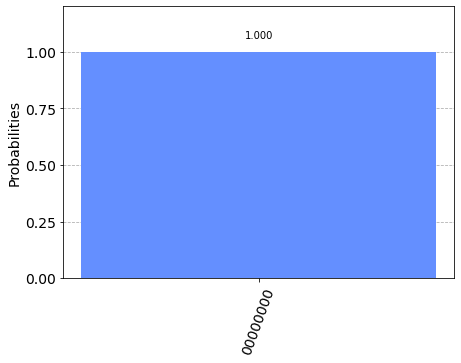

In [6]:
sim = Aer.get_backend('aer_simulator')  # this is the simulator we'll use
qobj = assemble(qc_output)  # this turns the circuit into an object our backend can run
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

### Quantum adder circuit

Flipping the value of 7th qubit using x-gate  
```
circuit_name.x(qubit_number)
```

In [7]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

Combining the circuits

In [8]:
qc = qc_encode + qc_output
qc.draw()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/qiskit/circuit/quantumcircuit.py:933: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


┌─┐                     
q_0: ─────┤M├─────────────────────
          └╥┘┌─┐                  
q_1: ──────╫─┤M├──────────────────
           ║ └╥┘┌─┐               
q_2: ──────╫──╫─┤M├───────────────
           ║  ║ └╥┘┌─┐            
q_3: ──────╫──╫──╫─┤M├────────────
           ║  ║  ║ └╥┘┌─┐         
q_4: ──────╫──╫──╫──╫─┤M├─────────
           ║  ║  ║  ║ └╥┘┌─┐      
q_5: ──────╫──╫──╫──╫──╫─┤M├──────
           ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ──────╫──╫──╫──╫──╫──╫─┤M├───
     ┌───┐ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ┤ X ├─╫──╫──╫──╫──╫──╫──╫─┤M├
     └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/══════╩══╩══╩══╩══╩══╩══╩══╩═
           0  1  2  3  4  5  6  7

Seeing the result of the flip, 7th bit has a value of 1

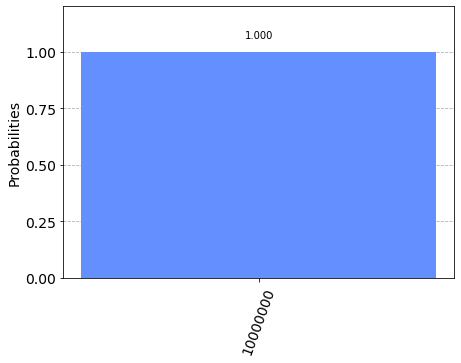

In [9]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

Encoding my age in the circuit

In [10]:
qc_encode = QuantumCircuit(n)
qc_encode.x(1)
qc_encode.x(2)
qc_encode.x(4)

qc_encode.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     ├───┤
q_2: ┤ X ├
     └───┘
q_3: ─────
     ┌───┐
q_4: ┤ X ├
     └───┘
q_5: ─────
          
q_6: ─────
          
q_7: ─────

Creating a circut with XOR gate, in quantum computing it's job is done using CNOT (controlled-not) - be careful their truth tables are different so CNOT =/= XOR
```
circuit_name.cx(control_qubit, target_qubit)
```
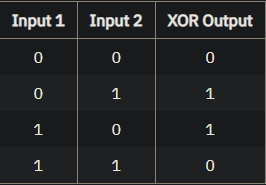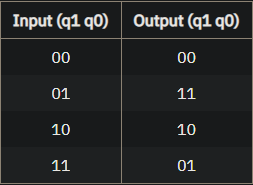


In [11]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0, 1)

qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [12]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0, 1)

for qubit_number in range(2):
  qc.measure(qubit_number, qubit_number)

qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

As we can see by running the experiment below, this is not a desired result that we would get by using XOR, because of that we have to make a few tweak to the circuit

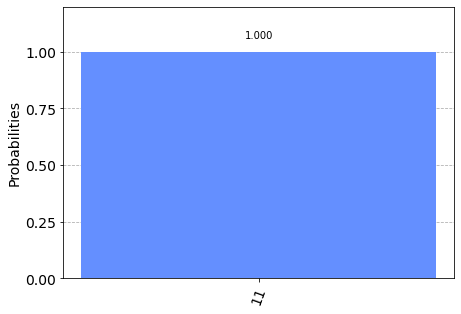

In [13]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

To make a XOR gate we have to put 2 CNOTs in the circuit, it's a first step of building a half adder which is a part the adding circuit which we are trying to make


In [14]:
qc_ha = QuantumCircuit(4, 2)

qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier() # barrier is used to tell the compiler which parts of the circuit can be compiled separately

qc_ha.cx(0, 2)
qc_ha.cx(1, 2)
qc_ha.barrier()

qc_ha.measure(2, 0)
qc_ha.measure(3, 1)

qc_ha.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     ├───┤ ░   │        ░       
q_1: ┤ X ├─░───┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

There is one more step between a XOR gate and a working half adder - we need to use what's called a Toffoli gate which behaves pretty much like an AND gate in quantum world. 
```
circuit_name.ccx(control_qubit1, control_qubit2, target_qubit)
```
This way we will get a 1 on the first left qubit in case of two 1s on input. 

In [15]:
qc_ha = QuantumCircuit(4, 2)

qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier() # barrier is used to tell the compiler which parts of the circuit can be compiled separately

# XOR gate build with two CNOT gates
qc_ha.cx(0, 2)
qc_ha.cx(1, 2)
qc_ha.barrier()

# AND gate (Toffoli) build with CCNOT
qc_ha.ccx(0, 1, 3)
qc_ha.barrier()

qc_ha.measure(2, 0)
qc_ha.measure(3, 1)

qc_ha.draw()

┌───┐ ░            ░       ░       
q_0: ┤ X ├─░───■────────░───■───░───────
     ├───┤ ░   │        ░   │   ░       
q_1: ┤ X ├─░───┼────■───░───■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░   │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░───┼───░─┤M├───
           ░ └───┘└───┘ ░ ┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░────────────░─┤ X ├─░──╫─┤M├
           ░            ░ └───┘ ░  ║ └╥┘
c: 2/══════════════════════════════╩══╩═
                                   0  1

Running the simulation to see the results of computations

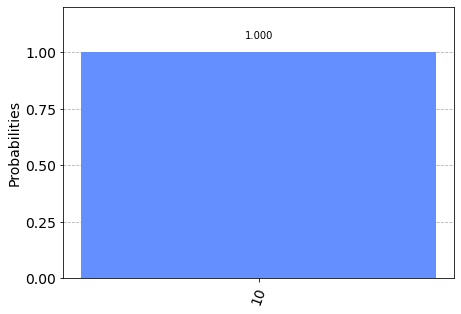

In [16]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

By running the simulation we can see that the circuit we've built knows how to deal with binary 1 + 1, we can now try to put the 3 other possible inputs just to be sure.

To play around with ```QuantumCircuit``` attributes we can work on the existing circuit.

Printing the data describing the circuit we've built to see what needs to be changed

In [17]:
for i in qc_ha.data:
  print(i)

(<qiskit.circuit.library.standard_gates.x.XGate object at 0x7f0c46bc7c90>, [Qubit(QuantumRegister(4, 'q'), 0)], [])
(<qiskit.circuit.library.standard_gates.x.XGate object at 0x7f0c46bb5150>, [Qubit(QuantumRegister(4, 'q'), 1)], [])
(<qiskit.circuit.barrier.Barrier object at 0x7f0c46bc7d90>, [Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 2), Qubit(QuantumRegister(4, 'q'), 3)], [])
(<qiskit.circuit.library.standard_gates.x.CXGate object at 0x7f0c46bc7c50>, [Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 2)], [])
(<qiskit.circuit.library.standard_gates.x.CXGate object at 0x7f0c46bc7f50>, [Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 2)], [])
(<qiskit.circuit.barrier.Barrier object at 0x7f0c46bc7e90>, [Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 2), Qubit(QuantumRegister(4, 'q'), 3)], [])
(<qiskit.circuit.library.standard_gates.x.CCXGate ob

Changing the input to be 01, by deleting the first X gate from the circuit in not so elegant, but apparently the only way it can be done without re-doing the whole circuit

In [18]:
data = qc_ha.data.copy()
qc_ha01 = qc_ha.copy()

del data[0]

qc_ha01.data = data
qc_ha01.draw()

░            ░       ░       
q_0: ──────░───■────────░───■───░───────
     ┌───┐ ░   │        ░   │   ░       
q_1: ┤ X ├─░───┼────■───░───■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░   │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░───┼───░─┤M├───
           ░ └───┘└───┘ ░ ┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░────────────░─┤ X ├─░──╫─┤M├
           ░            ░ └───┘ ░  ║ └╥┘
c: 2/══════════════════════════════╩══╩═
                                   0  1

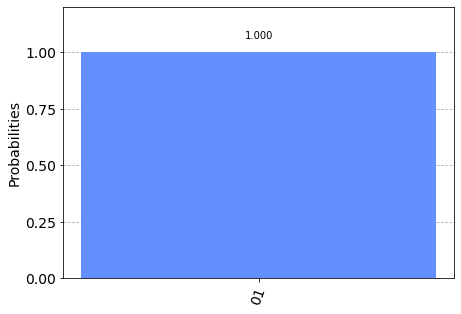

In [19]:
qobj = assemble(qc_ha01)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

Changing the input to be 00, you can change the circut draw to the cool-look, by adding 'mpl' as an argument  
```
circuit_name.draw('mpl')
```

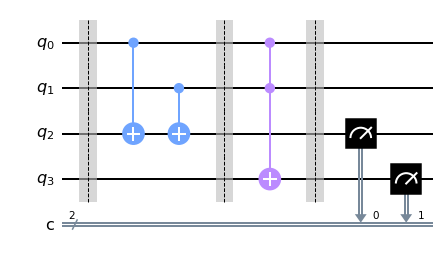

In [20]:
data = qc_ha.data.copy()
qc_ha00 = qc_ha.copy()

del data[0]
del data[0]

qc_ha00.data = data
qc_ha00.draw('mpl')

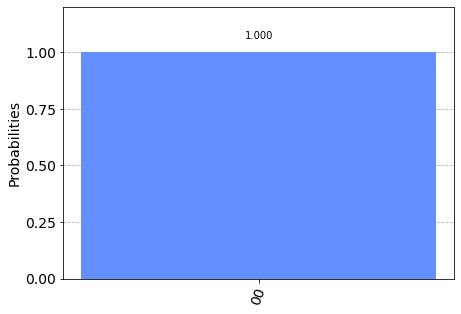

In [21]:
qobj = assemble(qc_ha00)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

Changing the input to be 10, by trying to add the X gate object to existing ```qc_ha00``` circuit

It wasn't easy

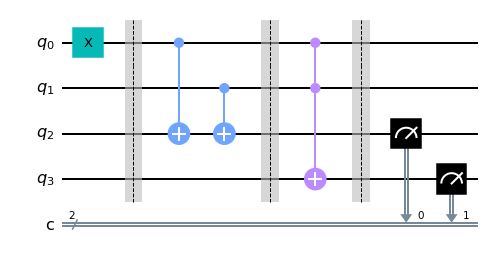

In [32]:
data = qc_ha00.data.copy()
qc_ha10 = qc_ha00.copy()

data.insert(0, 
            (
                q.circuit.library.standard_gates.x.XGate(), 
                [q.circuit.Qubit(q.QuantumRegister(4, 'q'), 0)],
                []
            )
)

qc_ha10.data = data
qc_ha10.draw('mpl')

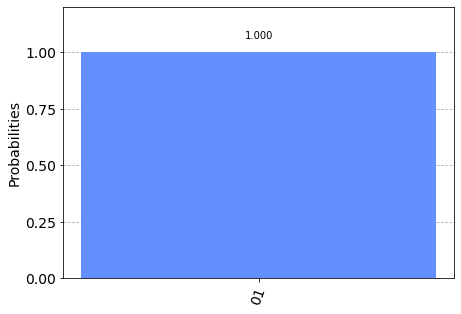

In [33]:
qobj = assemble(qc_ha10)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

Ok, our circuit is all cool and dandy so we can proceed to the next chapter of IBM Qiskit Course


**TODO:**
* turn half adder circuit into a gate so it's easier to use
* combine half adder circuit with different input circuits to learn how to change input without going all the way down to adding objects to memory